<a href="https://colab.research.google.com/github/amanda-coj/MD_Suicide_Rate/blob/main/MD_Suicide_Rate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Análise de Dados de Taxas de Suicídio (1985-2016)**

Este notebook tem como objetivo baixar e analisar um conjunto de dados sobre taxas de suicídio entre **1985 e 2016**. Utilizaremos ferramentas como **Python, Pandas, Seaborn e Matplotlib** para explorar os dados e visualizar tendências ao longo do tempo.


# **Configuração da API do Kaggle para instalar o dataset**


In [53]:
from google.colab import files

In [54]:
files.upload()



Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"amandacoj","key":"89af22b4406b8807f02c749975a286ca"}'}

In [55]:
pip install kaggle q

In [56]:
!mkdir ~p ~/.kaggle

mkdir: cannot create directory ‘~p’: File exists
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [57]:
!cp kaggle.json ~/.kaggle/

In [58]:
!chmod 600 ~/.kaggle/kaggle.json

In [59]:
!kaggle datasets list

ref                                                                 title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
asinow/car-price-dataset                                            Car Price Dataset                                   135KB  2025-01-26 19:53:28          18371        299  1.0              
ak0212/indian-bike-sales-dataset                                    Indian Bike Sales Dataset                           266KB  2025-02-21 12:20:27           1104         24  1.0              
samayashar/fraud-detection-transactions-dataset                     Fraud Detection Transactions Dataset                  2MB  2025-02-21 18:06:23           1216         25  1.0              
abdulmalik1518/mobiles-dataset-2025     

In [60]:
!kaggle datasets download -d russellyates88/suicide-rates-overview-1985-to-2016

Dataset URL: https://www.kaggle.com/datasets/russellyates88/suicide-rates-overview-1985-to-2016
License(s): world-bank
suicide-rates-overview-1985-to-2016.zip: Skipping, found more recently modified local copy (use --force to force download)


In [61]:
!unzip suicide-rates-overview-1985-to-2016.zip

Archive:  suicide-rates-overview-1985-to-2016.zip
replace master.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: master.csv              


In [62]:
!pip install basemap
!pip install basemap-data-hires


  Using cached basemap_data_hires-1.3.2-py2.py3-none-any.whl.metadata (2.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 8.9 MB/s eta 0:00:00


In [63]:
# Importando Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# **Analise Exploratoria**


In [64]:
df = pd.read_csv('suicide-rates-overview-1985-to-2016.zip')
df
display(df.head(20))

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,NaN,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,NaN,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,NaN,"2,156,624,900",796,Generation X


In [65]:
# Mostrar o tipo de dados de cada coluna
print(df.dtypes)

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)      object
gdp_per_capita ($)      int64
generation             object
dtype: object


In [66]:
# Verificação de valores nulos
df.isnull()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,True,False,False,False
2,False,False,False,False,False,False,False,False,True,False,False,False
3,False,False,False,False,False,False,False,False,True,False,False,False
4,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,False,False,False,False,False,False,False,False,False,False,False,False
27816,False,False,False,False,False,False,False,False,False,False,False,False
27817,False,False,False,False,False,False,False,False,False,False,False,False
27818,False,False,False,False,False,False,False,False,False,False,False,False


In [67]:
# Descobrindo valoresnulos
null_val = df.isnull()
for i in df.columns:
    print(i, end=", ")

country, year, sex, age, suicides_no, population, suicides/100k pop, country-year, HDI for year,  gdp_for_year ($) , gdp_per_capita ($), generation, 

In [68]:
for col in df.columns:
    print('nulls in '+col+' :', len(null_val[null_val[col]==True]))


nulls in country : 0
nulls in year : 0
nulls in sex : 0
nulls in age : 0
nulls in suicides_no : 0
nulls in population : 0
nulls in suicides/100k pop : 0
nulls in country-year : 0
nulls in HDI for year : 19456
nulls in  gdp_for_year ($)  : 0
nulls in gdp_per_capita ($) : 0
nulls in generation : 0


In [69]:
df.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [70]:
df.replace(np.NaN,-99999.0,inplace=True)
df.head(10)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,-99999.0,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,-99999.0,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,-99999.0,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,-99999.0,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,-99999.0,"2,156,624,900",796,Boomers
5,Albania,1987,female,75+ years,1,35600,2.81,Albania1987,-99999.0,"2,156,624,900",796,G.I. Generation
6,Albania,1987,female,35-54 years,6,278800,2.15,Albania1987,-99999.0,"2,156,624,900",796,Silent
7,Albania,1987,female,25-34 years,4,257200,1.56,Albania1987,-99999.0,"2,156,624,900",796,Boomers
8,Albania,1987,male,55-74 years,1,137500,0.73,Albania1987,-99999.0,"2,156,624,900",796,G.I. Generation
9,Albania,1987,female,5-14 years,0,311000,0.00,Albania1987,-99999.0,"2,156,624,900",796,Generation X


In [71]:
# Função para converter dados categóricos em dados numéricos
def categorical_data(df):
    columns = df.columns.values
    """
    Converts categorical values into numerical values

    """
    for column in columns:
        numeric_val = {}

        def converting_to_numerical(val):
            return numeric_val[val]

        if df[column].dtype != np.int64 and df[column].dtype != np.float64:
            column_vals = df[column].values.tolist()
            unique_val = set(column_vals)

            x = 0

            for unique in unique_val:
                if unique not in numeric_val:
                    numeric_val[unique] = x

                    x += 1

            df[column] = list(map(converting_to_numerical, df[column]))

    return df


In [72]:
categorical_data(df)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,28,1987,1,4,21,312900,6.71,269,-99999.000,887,796,0
1,28,1987,1,2,16,308000,5.19,269,-99999.000,887,796,5
2,28,1987,0,4,14,289700,4.83,269,-99999.000,887,796,0
3,28,1987,1,0,1,21800,4.59,269,-99999.000,887,796,2
4,28,1987,1,5,9,274300,3.28,269,-99999.000,887,796,3
...,...,...,...,...,...,...,...,...,...,...,...,...
27815,24,2014,0,2,107,3620833,2.96,1560,0.675,804,2309,0
27816,24,2014,0,0,9,348465,2.58,1560,0.675,804,2309,5
27817,24,2014,1,1,60,2762158,2.17,1560,0.675,804,2309,1
27818,24,2014,0,1,44,2631600,1.67,1560,0.675,804,2309,1


Pre-Processing for modelling
# **Pré-processamento para modelagem**


In [73]:
# Para evitar erros de valor
from sklearn import *


In [74]:
# Criar X & y

X_df = df.drop("suicides_no", axis=1)
y_df = df["suicides_no"]

X_df.shape, y_df.shape

((27820, 11), (27820,))

In [75]:
# Embaralhar antes da divisão dos dados em conjuntos de dados de treinamento e teste
np.random.seed(42)

df = df.sample(frac=1)
df.head(20)

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
17437,85,2015,1,1,1,987750,0.10,203,-99999.000,1164,47206,1
23991,12,2001,0,0,31,222745,13.92,2311,-99999.000,828,912,5
8337,8,2013,0,2,19,748153,2.54,679,0.664,868,3885,0
21661,98,1987,0,0,0,1500,0.00,2172,-99999.000,2281,1908,2
6235,48,2003,0,0,0,54020,0.00,2166,-99999.000,2178,4583,5
20326,23,1993,1,0,91,221700,41.05,514,-99999.000,2021,9479,2
1109,63,2002,1,4,5,293350,1.70,1999,-99999.000,1263,788,4
24552,18,2002,1,4,78,533111,14.63,444,-99999.000,2320,31175,4
26109,39,1990,1,4,613,3544600,17.29,439,0.705,2032,1698,0
13494,53,1995,1,1,43,7125500,0.60,2008,0.838,1273,46043,4


In [76]:
# Dividindo os dados em conjuntos de dados de treinamento e teste
from sklearn.model_selection import train_test_split

np.random.seed(42)

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, test_size=0.2)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(22256, 11) (5564, 11) (22256,) (5564,)


#**Modelling (model_1)**


In [77]:
# Usando regressão linear para modelar model_1
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from math import sqrt

np.random.seed(42)

model_1 = LinearRegression()
model_1.fit(X_train, y_train)

# Training accuracy
model_1.score(X_train, y_train)

0.468046671736132

In [78]:
# Prevendo com model_1
y_pred = model_1.predict(X_test)

In [79]:
# Métricas (Pontuação R2 (r2), Erro Quadrático Médio (MSE), Raiz do Erro Quadrático Médio (RMSE))
print("MSE : ", mean_squared_error(y_test, y_pred))
print("r2 : ", 1 - r2_score(y_test, y_pred))
print("RMSE : ", np.sqrt(mean_squared_error(y_test, y_pred)))

MSE :  373564.73886121856
r2 :  0.4939592614038758
RMSE :  611.1994264241571


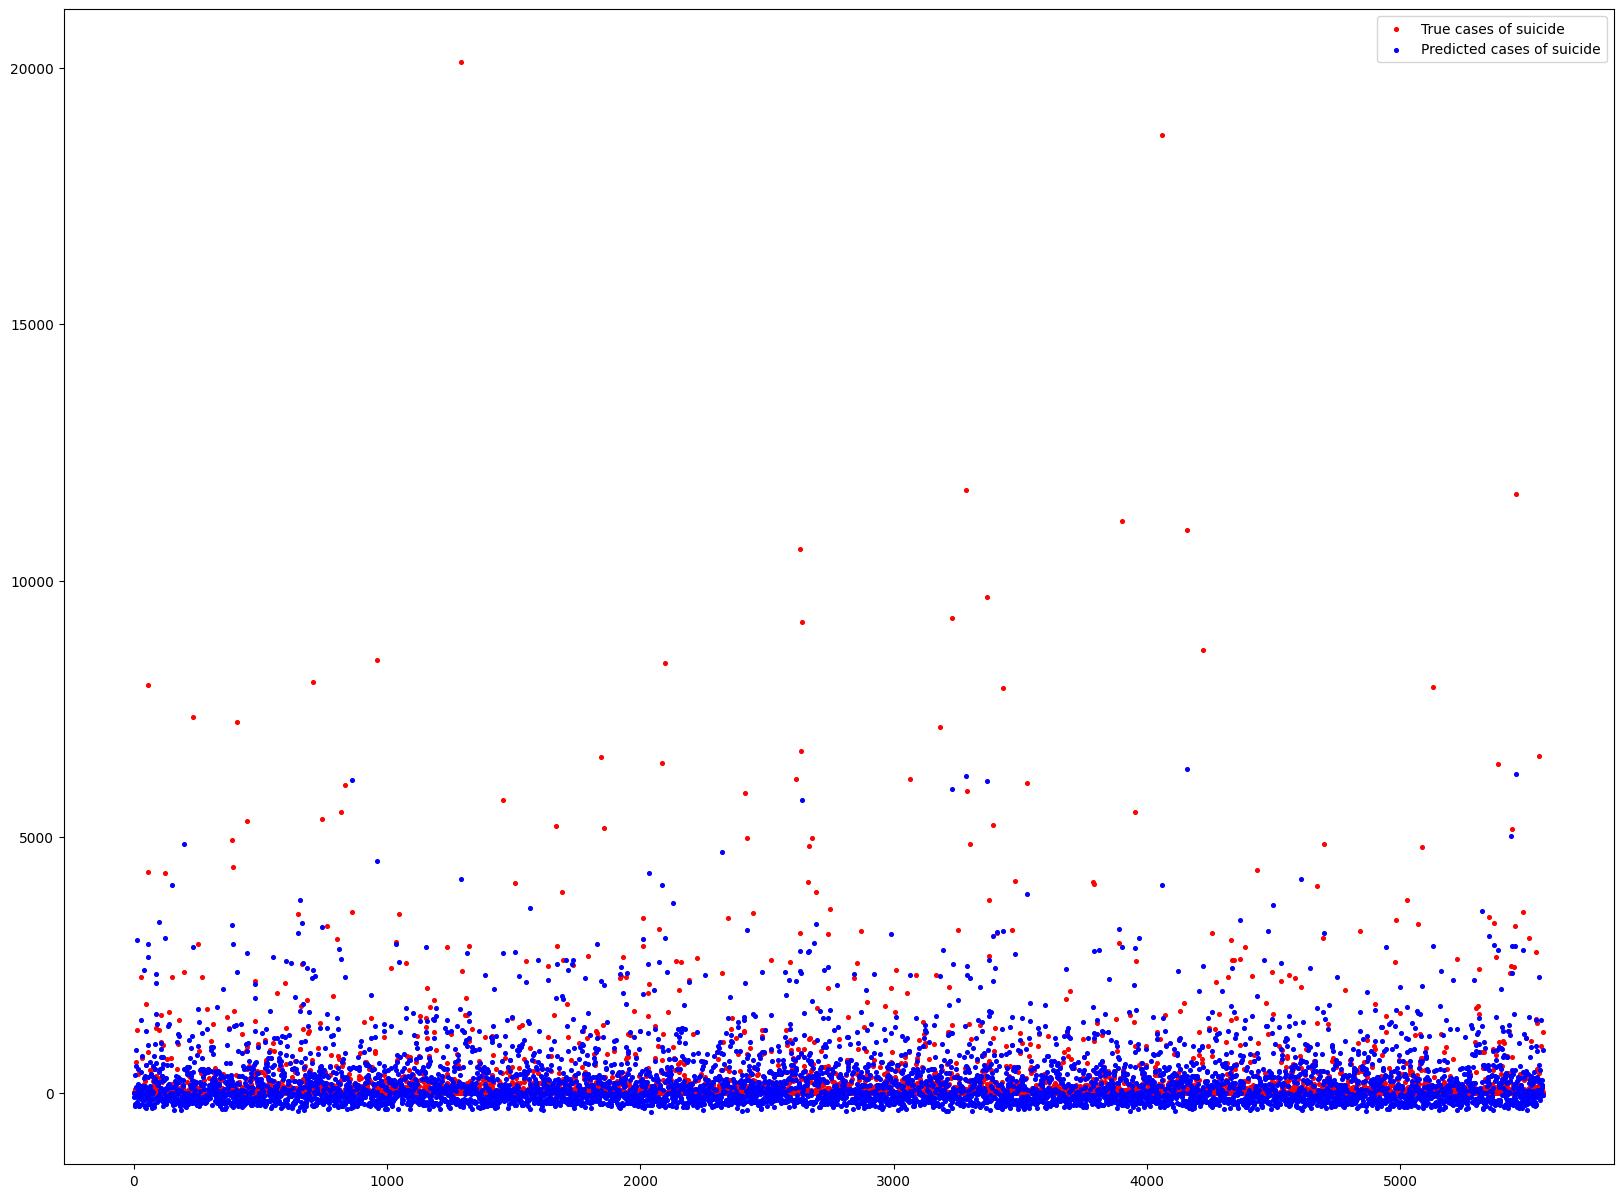

In [80]:
# Plotando a validação para model_1 (modelo de regressão linear)np.random.seed(42)

fig, ax = plt.subplots(figsize=(20, 15))
a = np.arange(1, len(y_test) + 1, 1)
plt.scatter(a, y_test, label = "True cases of suicide", s=7, color="red")
plt.legend()
plt.scatter(a, y_pred, label = "Predicted cases of suicide", s=7, color="blue")
plt.legend()
plt.show();

In [81]:
# model_2 usando Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

model_2 = RandomForestRegressor()
model_2.fit(X_train, y_train)
model_2.score(X_train, y_train)

KeyboardInterrupt: 

In [ ]:
# Previsão em dados de teste
y_pred = model_2.predict(X_test)

In [ ]:
# Métricas para avaliaçãofrom math import sqrt

print("MSE : ", mean_squared_error(y_test, y_pred))
print("r2 Score: ", 1-r2_score(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))

In [ ]:
# Traçando as previsões
np.random.seed(42)

fig, ax = plt.subplots(figsize=(20, 15))
plt.scatter(a, y_test, label = "Casos reais de suicídio", s=7, color="red")
plt.legend()
plt.scatter(a, y_pred, label ="Casos previstos de suicídio", s=7, color="blue")
plt.legend()
plt.show();

Predição sem a coluna "HDI para o ano"
Remover a coluna "HDI para o ano" pode ser benéfico, pois ela contém cerca de 70% de dados nulos.

In [ ]:
# Modelagem model_3 sem coluna "HDI para ano"
X_train3 = X_train.drop("HDI for year", 1)
X_test3 = X_test.drop("HDI for year", 1)

# Usando Random Forest Regressor
model_3 = RandomForestRegressor()
# Ajuste o modelo
model_3.fit(X_train3, y_train)
# Pontuação
model_3.score(X_train3, y_train

# **model_3 tem uma precisão de treinamento de 99,9227%**

In [ ]:
# Para evitar possível erro de valor
from sklearn import *

# Prevendo com model_3
y_pred = model_3.predict(X_test_3)

In [ ]:
# Métricas para avaliação
from math import sqrt

print("MSE : ", mean_squared_error(y_test, y_pred))
print("r2 Score: ", 1-r2_score(y_test, y_pred))
print("RMSE: ", np.sqrt(mean_squared_error(y_test, y_pred)))